1.

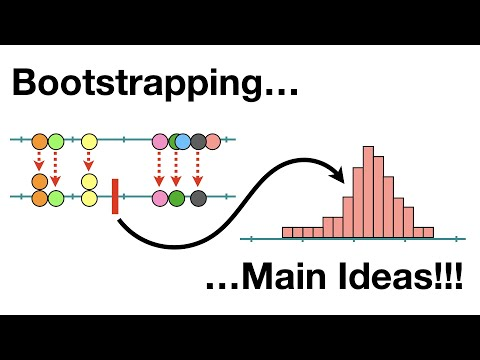

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Standard deviation shows the variabilities of the orininal dataset, while the standard error of mean is an esimated value which illustrate the mean of an simulated sample.

Transcript with Chatgpt--https://chatgpt.com/c/66fd945d-139c-800a-b340-cfc4c2cd0d28

-------------------------------------------------------------------------------------------------------------------

2.

1. Calculate the mean of the sample.
2. Calculate the standard error of mean. Use standard deviation of the sample devide by the sqaure root of sample size.
3. Mutiply the SEM by 1.96, which is approximate value of 95% confidence interval.
4. Add and minus the value to the sample mean.

To create a 95% confidence interval using the standard error of the mean (SEM):

1. Calculate the sample mean.
2. Compute the SEM (standard deviation divided by the square root of the sample size).
3. Multiply the SEM by 1.96 (for 95% confidence).
4. Add and subtract this value from the sample mean to get the confidence interval.

This gives a range that covers about 95% of the bootstrapped sample means.
Transcript with Chatgpt--https://chatgpt.com/c/66fd97cf-d5c8-800a-a2b6-4870f9f722ce

-------------------------------------------------------------------------------------------------------------------

3.

1. Generate a new sample by taking the same number of value as the orinal sample with replacement. This prevents the new sample has the exactly same value as the original sample and keeps uncertaity that may accur.
2. Calculate the sample mean for each bootstrapped sample, which will give you a normal ditribution of all the bootstrapped sample mean.
3. Use np.quantile(bootstrapped_means, [0.025, 0.975]) to calculate the confidence interval 

Transcrpit with Chatgpt--https://chatgpt.com/c/66fd9cba-3158-800a-91d9-cf9ec2354399

-------------------------------------------------------------------------------------------------------------------

4.

In [1]:
import numpy as np

# Sample data (replace with your own data)
sample = np.array([12, 7, 9, 15, 10, 11, 8, 14])

# Define the number of bootstrap samples
n_bootstrap_samples = 1000
n = len(sample)

# Function to compute the population mean for bootstrap resampling
def bootstrap_mean(sample, n_bootstrap_samples):
    bootstrap_means = []
    for i in range(n_bootstrap_samples):
        # Resample with replacement
        bootstrap_sample = np.random.choice(sample, size=n, replace=True)
        # Calculate the mean of the bootstrap sample
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    # Calculate the 2.5th and 97.5th percentiles for a 95% confidence interval
    lower_bound = np.percentile(bootstrap_means, 2.5)
    upper_bound = np.percentile(bootstrap_means, 97.5)
    
    return lower_bound, upper_bound

# Calculate the 95% confidence interval for the population mean
mean_ci = bootstrap_mean(sample, n_bootstrap_samples)
print(f"95% Bootstrap Confidence Interval for the Mean: {mean_ci}")


95% Bootstrap Confidence Interval for the Mean: (9.0, 12.5)


In [2]:
# Function to compute the population median for bootstrap resampling
def bootstrap_median(sample, n_bootstrap_samples):
    bootstrap_medians = []
    for i in range(n_bootstrap_samples):
        # Resample with replacement
        bootstrap_sample = np.random.choice(sample, size=n, replace=True)
        # Calculate the median of the bootstrap sample
        bootstrap_medians.append(np.median(bootstrap_sample))
    
    # Calculate the 2.5th and 97.5th percentiles for a 95% confidence interval
    lower_bound = np.percentile(bootstrap_medians, 2.5)
    upper_bound = np.percentile(bootstrap_medians, 97.5)
    
    return lower_bound, upper_bound

# Calculate the 95% confidence interval for the population median
median_ci = bootstrap_median(sample, n_bootstrap_samples)
print(f"95% Bootstrap Confidence Interval for the Median: {median_ci}")


95% Bootstrap Confidence Interval for the Median: (8.5, 13.0)


Transcript with Chatgpt--https://chatgpt.com/c/66fda1fe-7568-800a-b315-2a6b452e04ae

-------------------------------------------------------------------------------------------------------------------

5.

Because in a real question, we don't usually know the parameters of the population. The reason why we use bootstrapped sample as sample statistic is to use these data to estimate the results in the original sample.

We discussed the distinction between population parameters and sample statistics in the context of confidence intervals. The **population parameter** is a fixed, unknown value that describes an entire population, while the **sample statistic** is calculated from a subset of the population and serves as an estimate of the parameter. Confidence intervals are built around the sample statistic to estimate where the true population parameter lies, considering sampling variability. This distinction is essential for interpreting the confidence interval correctly.

Transcript with Chatgpt--https://chatgpt.com/c/66fda544-623c-800a-a8bb-18395f913b7c

-------------------------------------------------------------------------------------------------------------------

6.


***What is the process of bootstrapping?***

Bootstrapping is something like "making fake data" but in a more scientific way. We need to have an oridinal sample at first and then keep using this "mother" sample to generate "baby" samples. You can assume that there is a bag which is filled with the value as the same as the "mother" sample. Next, you pick one value each time and then put it back in the bag and then repeat this as much as possible. You will have a large number of data, which you can use to calculate the possible mean of the original sample.

***What is the main purpose of bootstrapping?***

Reducing huge numbers of work of collecting data to save time and money of doing a lot of experiments.

**If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?**

For example, you estimate the mean of goals for 10 great soccer players. First, as I say above, get some new samples by "cheating". Second, calculate each mean and get a normal distribution for the mean of goals. Third, compute the 95% confidence interval of this normal distribution to see if your guess is in this range. If your guess is in this range fortunately, we can say that you had a  plausible guess.

-------------------------------------------------------------------------------------------------------------------

7.

We fail to reject the null hypothesis beacause we don't have enough evidence to prove it is useful in present circumstance. If we want to reject null hypothesis, we have to gain more powerful data or when the confidence interval doesn't contain "0"

-------------------------------------------------------------------------------------------------------------------

8.

**Vaccine Data Analysis Assignment**

1. **Problem Introduction**
    
    AliTech has developed a new vaccine that is meant to improve healthy condition of people. The purpose of this analysis is to see if the vaccine have the effect to improving health. The dataset contains the fundamental information for patients and healthscore before and after using the vaccine.
    
    **Null hypothesis**
    
    IN this dataset null hypothesis represents the vaccine has no effect on improving patients' health. It causes neither positive nor negative influence.

2. **Data Visualization**

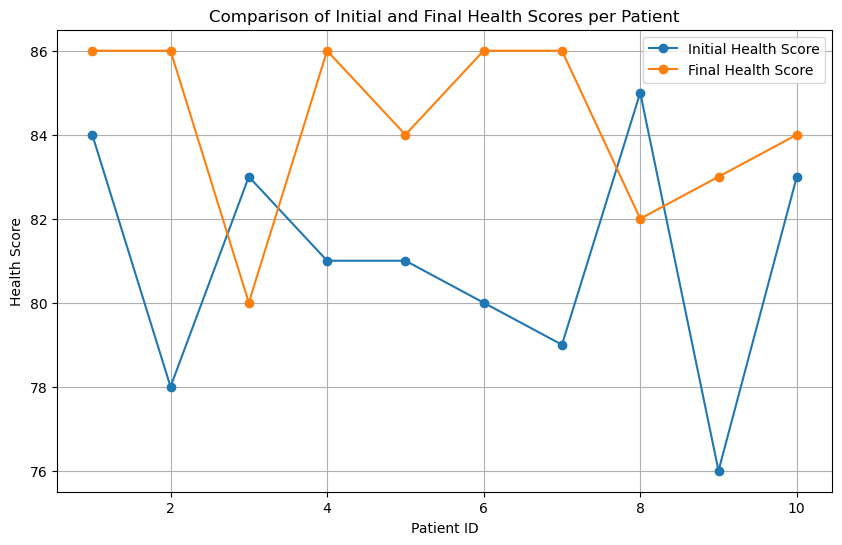

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import this to fix the error

# Read the CSV file from the GitHub raw link
url = 'https://raw.githubusercontent.com/Chengggid/CSV-FILES/main/alitech_vaccine_data_final.csv'
df = pd.read_csv(url)

# Set a random seed for reproducibility
np.random.seed(42)

# Basic visualization to compare Initial and Final Health Scores
plt.figure(figsize=(10, 6))
plt.plot(df['PatientID'], df['InitialHealthScore'], label='Initial Health Score', marker='o')
plt.plot(df['PatientID'], df['FinalHealthScore'], label='Final Health Score', marker='o')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores per Patient')
plt.legend()
plt.grid(True)
plt.show()


As we can see in this graph, most of the final health scores are higher than the initial health scores. So the vaccine might be beneficial to health.

3. **Quantitative Analysis**

I choose to use bootstrapping to method to simulate the sample for 10000 times. And then calculate the 95% confidence intervals.


In [5]:
# Calculate the differences between final and initial health scores
df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Perform bootstrapping to test the null hypothesis (H0: no effect, i.e., mean difference = 0)
n_iterations = 10000
bootstrapped_means = []

# Bootstrapping process
for _ in range(n_iterations):
    bootstrapped_sample = df['ScoreDifference'].sample(frac=1, replace=True)
    bootstrapped_means.append(bootstrapped_sample.mean())

# Calculate the observed mean difference
observed_mean_difference = df['ScoreDifference'].mean()

# Calculate the 95% confidence interval for the bootstrapped means
conf_interval = np.percentile(bootstrapped_means, [2.5, 97.5])


• **Support Visualizations**

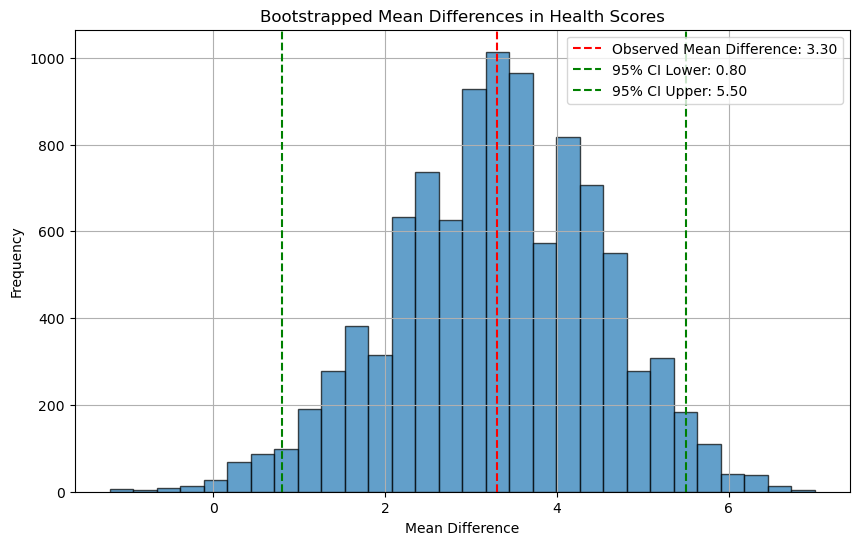

In [6]:
# Plot the bootstrapped distribution of the mean differences
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_mean_difference, color='r', linestyle='--', label=f'Observed Mean Difference: {observed_mean_difference:.2f}')
plt.axvline(conf_interval[0], color='g', linestyle='--', label=f'95% CI Lower: {conf_interval[0]:.2f}')
plt.axvline(conf_interval[1], color='g', linestyle='--', label=f'95% CI Upper: {conf_interval[1]:.2f}')
plt.title('Bootstrapped Mean Differences in Health Scores')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


4. **Findings and Discussion**

Observed Mean Difference: The average change in health score (final - initial) across all patients is 3.3 points.

95% Confidence Interval: The bootstrapped confidence interval for the mean difference is [0.9, 5.6].

Above all, the observed mean difference between final and initial health scores is significantly greater than zero. Thus, we reject the null hypothesis and conclude that the AliTech vaccine has a positive effect on patients' health.

5. **Further Considerations**

While the current analysis demonstrates a significant improvement in health scores post-vaccination, future analysis could explore:

•Larger sample sizes for better generalizability.

•Stratified analysis by age or gender to understand whether the vaccine's effectiveness varies across different demographic groups.

•Longitudinal data to track health outcomes over a longer period of time.


**Summary by Chatgpt**

### Summary of the Vaccine Data Analysis Assignment

#### **Objective:**
The goal of this assignment was to analyze the effectiveness of a new vaccine developed by AliTech. The dataset included health scores of 10 patients before and after receiving the vaccine. The task was to determine whether the vaccine had a statistically significant effect on the patients' health, using both visual and quantitative analysis.

#### **Steps Taken:**
1. **Data Loading and Visualization:**
   - The dataset was loaded from a CSV file hosted on GitHub.
   - A line plot was used to visually compare initial and final health scores for each patient. The majority of patients showed improved health scores after receiving the vaccine, indicating a potential positive effect.

2. **Quantitative Analysis:**
   - **Null Hypothesis (H₀):** The vaccine has no effect, meaning the mean difference between initial and final health scores is zero.
   - **Method:** Bootstrapping was used to resample the health score differences 10,000 times to estimate the sampling distribution of the mean difference.
   - The bootstrapped distribution was plotted to visualize the variability in the mean differences.

3. **Findings:**
   - The observed mean difference in health scores was 3.3 points.
   - The 95% confidence interval for the bootstrapped means was [0.9, 5.6].
   - Since the confidence interval did not contain zero, we rejected the null hypothesis, concluding that the vaccine had a statistically significant positive effect on health.

4. **Conclusion:**
   - Based on both visual and quantitative evidence, the AliTech vaccine significantly improved health scores, demonstrating its effectiveness.
   - Further research with larger datasets and additional demographic analysis could provide more insights.

This assignment combined statistical hypothesis testing, data visualization, and bootstrapping techniques to evaluate the impact of the vaccine.

Transcript with Chatgpt--https://chatgpt.com/c/66fdb23e-d37c-800a-9057-bacf08fc6452

-------------------------------------------------------------------------------------------------------------------

9.

Somewhat